## House Price Prediction


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

<Axes: >

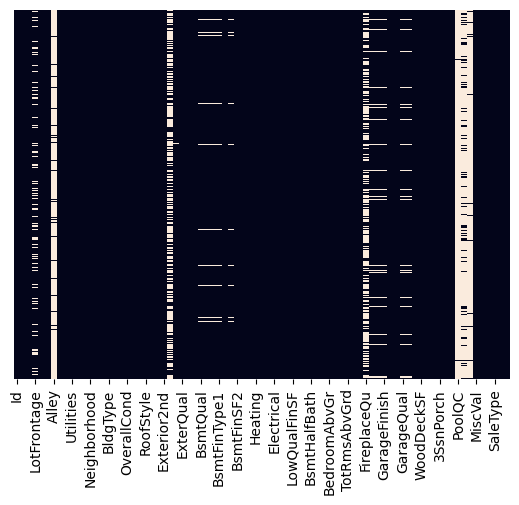

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.shape

(1459, 80)

In [ ]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [ ]:
df.drop(['Alley'],axis=1,inplace=True)
test.drop(['Alley'],axis=1,inplace=True)

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)
test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])

In [ ]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
test.isnull().sum()
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [ ]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

<Axes: >

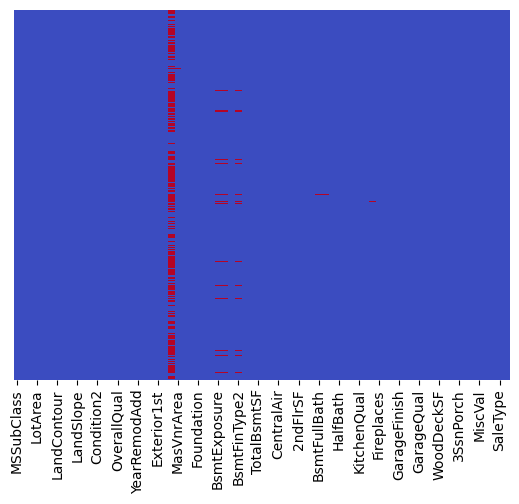

In [ ]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<Axes: >

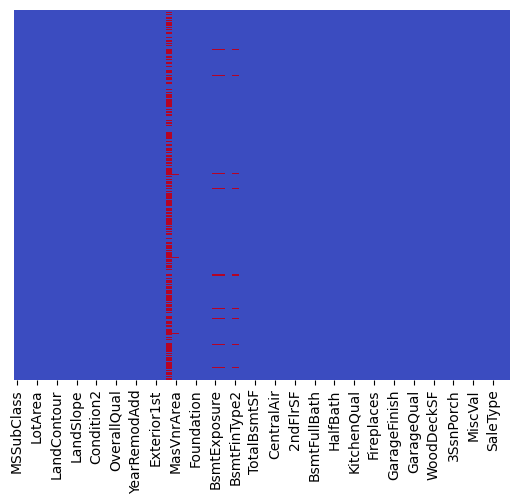

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

<Axes: >

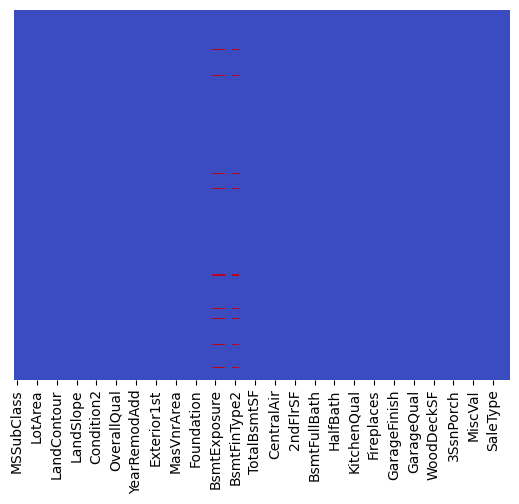

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
df['BsmtFinType2'].isnull().sum()

0

<Axes: >

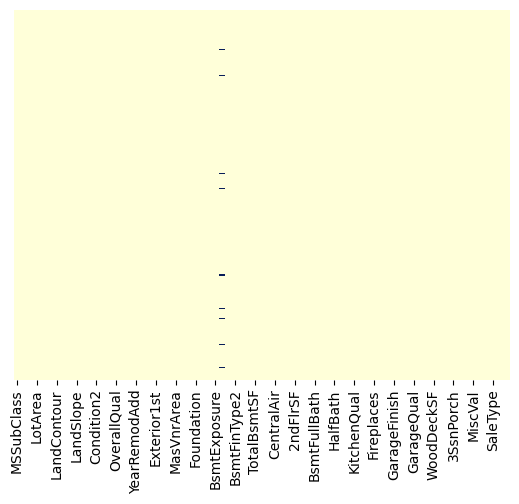

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

<Axes: >

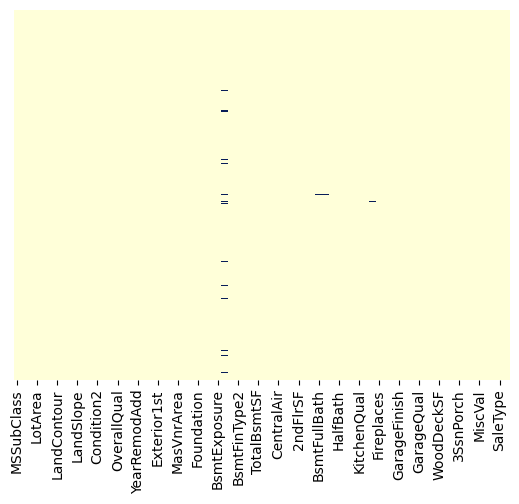

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df.dropna(inplace=True)
test.dropna(inplace=True)

<Axes: >

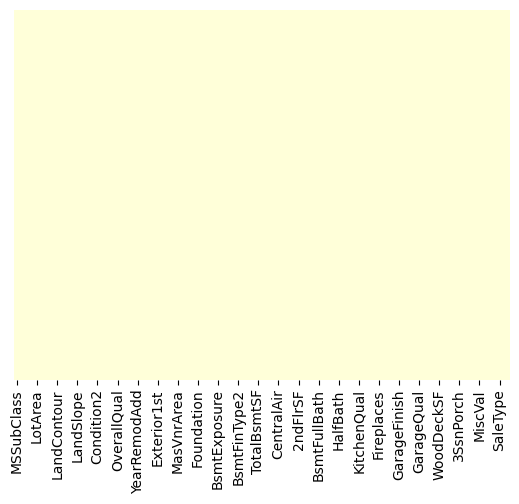

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df.shape

(1422, 75)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
##HAndle Categorical Features

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)
print(df.shape,test.shape)

(1422, 75) (1412, 74)


In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        #print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)
    print(df_final)
    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
## Combine Test Data

#test_df=pd.read_csv('formulatedtest.csv')

In [ ]:
test.shape

(1412, 74)

In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
final_df=pd.concat([df,test],axis=0)

In [ ]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
final_df.columns.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'IR2',
 'IR3',
 'Reg',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Mod',
 'Sev',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',

In [ ]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2834, dtype: float64

In [ ]:
final_df.shape

(2834, 75)

In [ ]:
final_df=category_onehot_multcols(columns)
#print(final_df)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [ ]:
final_df.shape

(2834, 232)

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(2834, 172)

In [ ]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,False,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,True,False,False,False,True,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,True,False,False,False,False,True,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,True,True,False,False,False,False,False,False


In [ ]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [ ]:
 df_Test.iloc[1]['SalePrice']

nan

In [ ]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,True,True,False,False,False,False,False,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,True,True,False,False,False,False,False,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,True,True,False,False,False,False,False,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,True,True,False,False,False,False,False,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
df_Train.shape

(1422, 172)

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-482-8fdc58f80b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


In [ ]:
df_Test.shape

(1412, 171)

In [ ]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,True,True,False,False,False,False,False,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,True,True,False,False,False,False,False,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,True,True,False,False,False,False,False,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,True,True,False,False,False,False,False,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
#df_Test.drop(['SalePrice'],axis=1).head()
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,True,False,False,True,False,False,False,False,False,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,False,False,True,True,False,False,False,False,False,False


In [ ]:
df_Test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,True,True,False,False,False,False,False,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,True,True,False,False,False,False,False,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,True,True,False,False,False,False,False,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,True,True,False,False,False,False,False,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,False,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,True,False,False,False,True,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,True,False,False,False,False,True,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,True,True,False,False,False,False,False,False


## Step2

In [ ]:
numeric_features=df_Train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#df_train is training data df_test is test data . training datan split x_train and y_train

In [ ]:
correlation=numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False))
print()

SalePrice        1.000000
OverallQual      0.787985
GrLivArea        0.709303
GarageCars       0.643039
GarageArea       0.622604
1stFlrSF         0.613887
TotalBsmtSF      0.610085
FullBath         0.573755
TotRmsAbvGrd     0.542785
YearBuilt        0.519014
YearRemodAdd     0.500512
MasVnrArea       0.470117
Fireplaces       0.461108
BsmtFinSF1       0.371987
LotFrontage      0.335397
WoodDeckSF       0.316252
2ndFlrSF         0.313502
OpenPorchSF      0.308757
HalfBath         0.271311
LotArea          0.263815
BsmtFullBath     0.211534
BsmtUnfSF        0.189384
BedroomAbvGr     0.166433
ScreenPorch      0.106284
PoolArea         0.091944
3SsnPorch        0.046233
MoSold           0.044061
MiscVal         -0.013616
BsmtFinSF2      -0.018805
BsmtHalfBath    -0.023147
YrSold          -0.025469
LowQualFinSF    -0.028858
MSSubClass      -0.084471
OverallCond     -0.095475
KitchenAbvGr    -0.104372
EnclosedPorch   -0.134379
Name: SalePrice, dtype: float64



In [ ]:
df_Train.drop(['MiscVal',
'BsmtFinSF2',
'BsmtHalfBath' ,
'YrSold' ,
'LowQualFinSF',
'MSSubClass',

'KitchenAbvGr',
'EnclosedPorch'],axis=1,inplace=True)



<ipython-input-491-2e00c8ff16b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Train.drop(['MiscVal',


<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

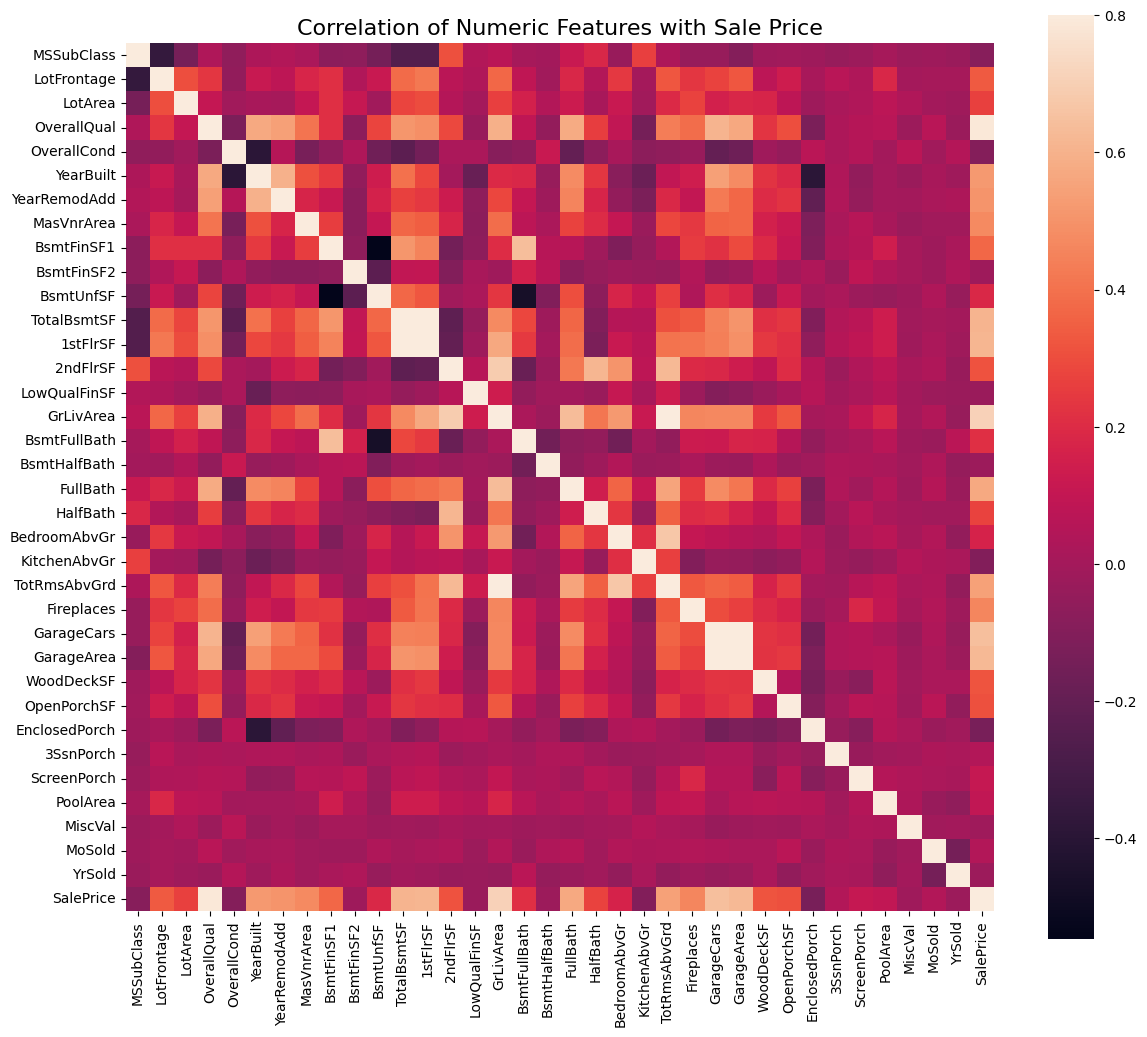

In [ ]:
f,ax=plt.subplots(figsize=(14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

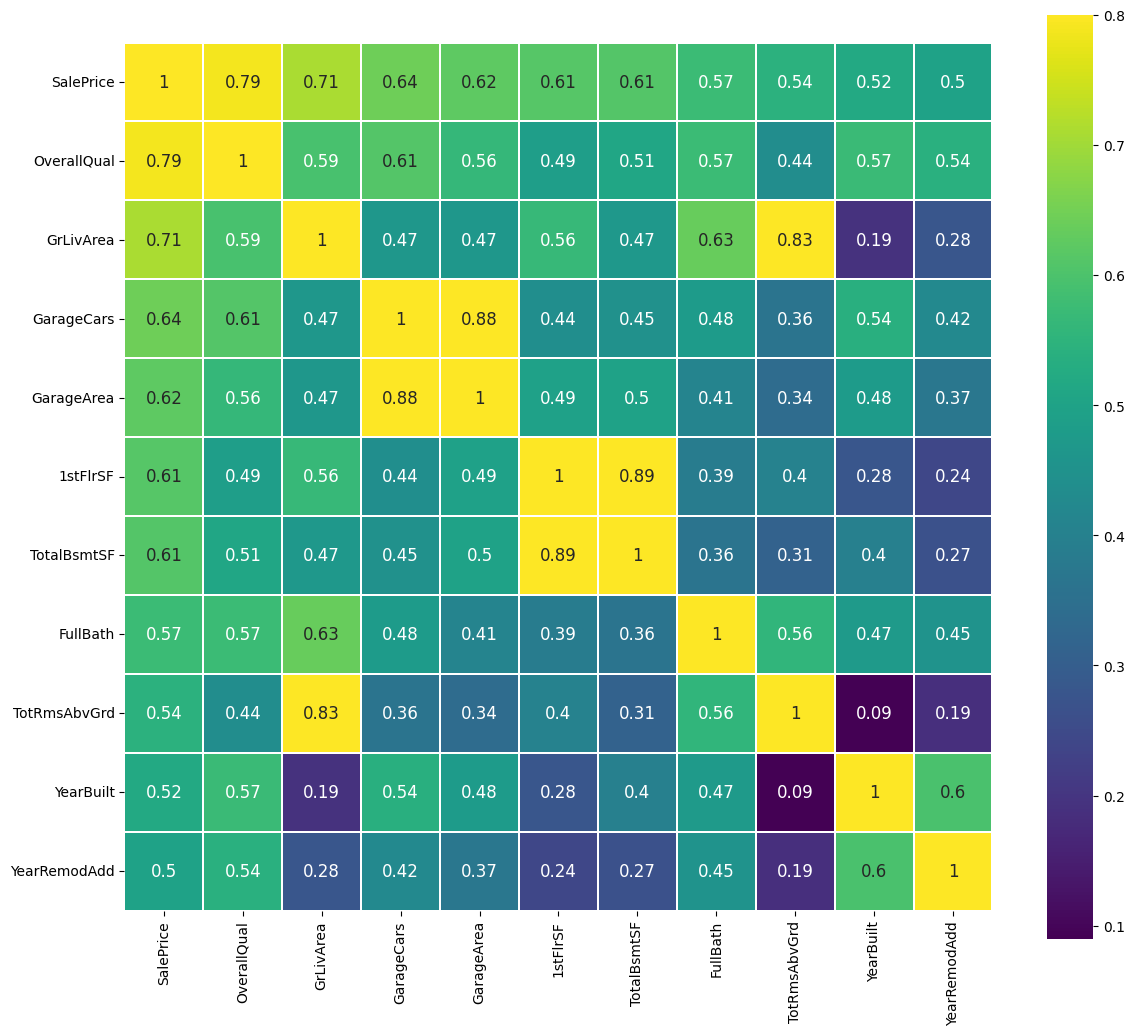

In [ ]:
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm=np.corrcoef(df_Train[cols].values.T)
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor='white',xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

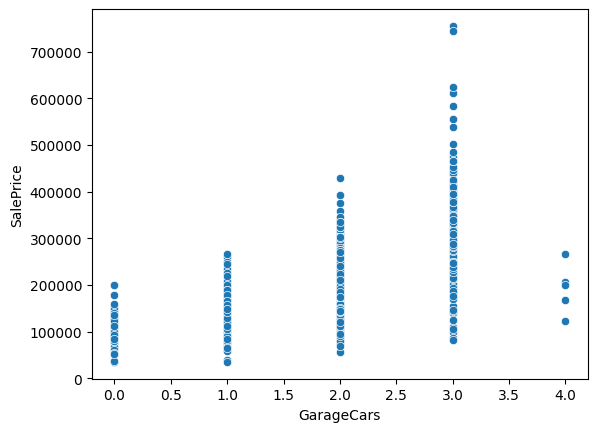

In [ ]:
sns.scatterplot(x='GarageCars',y='SalePrice',data=df_Train)

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

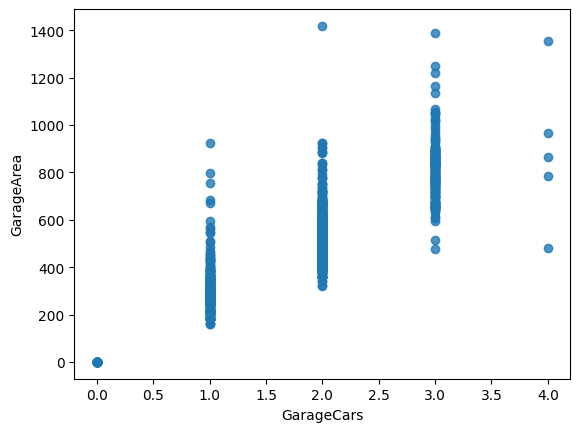

In [ ]:
sns.regplot(x='GarageCars',y='GarageArea',data=df_Train,scatter=True,fit_reg=False)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

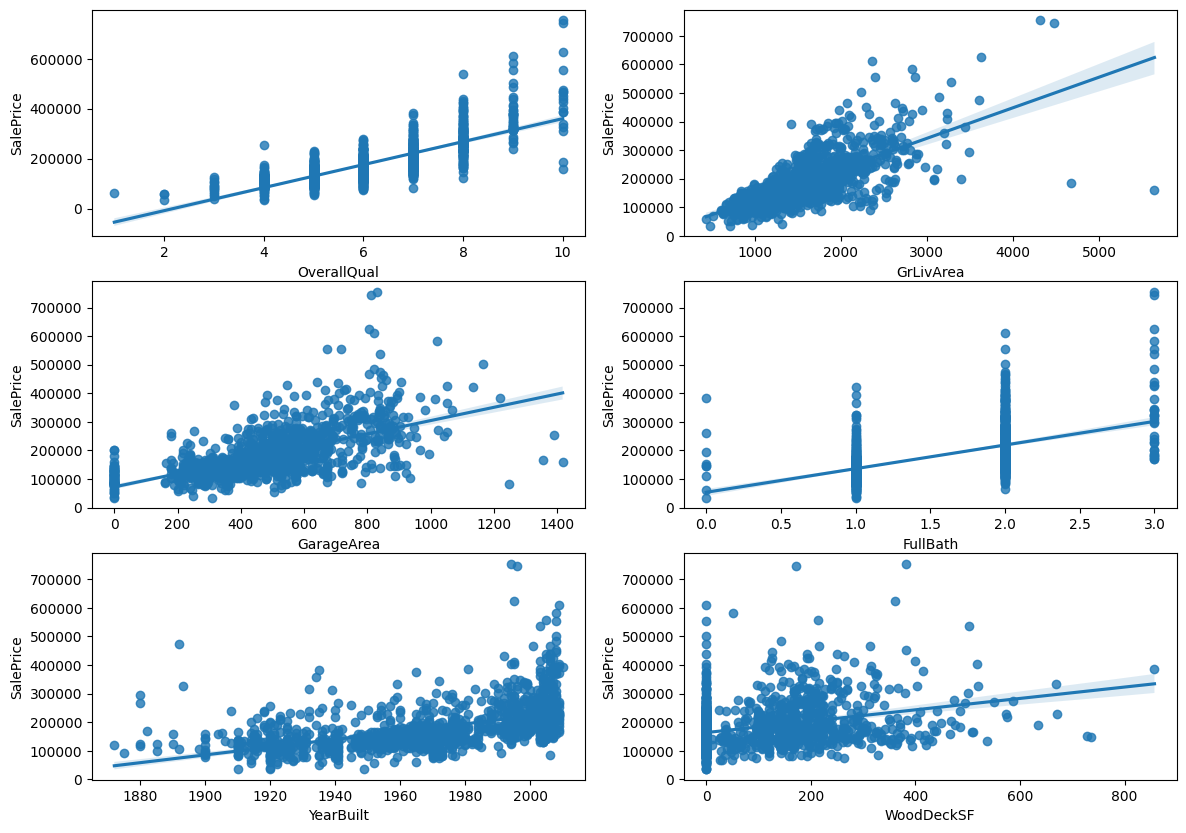

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))

sns.regplot(x='OverallQual',y='SalePrice',data=df_Train,scatter=True,fit_reg=True,ax=ax1)
sns.regplot(x='GrLivArea',y='SalePrice',data=df_Train,scatter=True,fit_reg=True,ax=ax2)
sns.regplot(x='GarageArea',y='SalePrice',data=df_Train,scatter=True,fit_reg=True,ax=ax3)
sns.regplot(x='FullBath',y='SalePrice',data=df_Train,scatter=True,fit_reg=True,ax=ax4)
sns.regplot(x='YearBuilt',y='SalePrice',data=df_Train,scatter=True,fit_reg=True,ax=ax5)
sns.regplot(x='WoodDeckSF',y='SalePrice',data=df_Train,scatter=True,fit_reg=True,ax=ax6)


In [ ]:
df_Train['SalePrice'].describe()

count      1422.000000
mean     182889.092124
std       79414.407095
min       34900.000000
25%      131625.000000
50%      165000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_train)

    # Calculate accuracy metrics
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)


    # Print the results
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    print("------------------------")


Model: Linear Regression
Mean Squared Error (MSE): 554759227.5575314
Root Mean Squared Error (RMSE): 23553.327313938713
R-squared (R2): 0.9119739006583929
------------------------
Model: Ridge Regression
Mean Squared Error (MSE): 707534121.2461313
Root Mean Squared Error (RMSE): 26599.51355281016
R-squared (R2): 0.8877324328274834
------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.552e+09, tolerance: 8.962e+08
  model = cd_fast.enet_coordinate_descent(


Model: Lasso Regression
Mean Squared Error (MSE): 555034076.6101718
Root Mean Squared Error (RMSE): 23559.161203450596
R-squared (R2): 0.9119302891440461
------------------------
Model: Random Forest
Mean Squared Error (MSE): 123405115.78564794
Root Mean Squared Error (RMSE): 11108.785522533413
R-squared (R2): 0.9804187646788022
------------------------
Model: Decision Tree
Mean Squared Error (MSE): 24222.925457102672
Root Mean Squared Error (RMSE): 155.63715962809997
R-squared (R2): 0.9999961564413231
------------------------
Model: Support Vector Machine
Mean Squared Error (MSE): 6619388940.8896265
Root Mean Squared Error (RMSE): 81359.62721700258
R-squared (R2): -0.05032770893578076
------------------------
Model: K-Nearest Neighbors
Mean Squared Error (MSE): 1387367636.6561463
Root Mean Squared Error (RMSE): 37247.384292808354
R-squared (R2): 0.7798602432530793
------------------------


In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,True,False,False,True,False,False,False,False,False,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,False,False,True,True,False,False,False,False,False,False


In [ ]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1422, dtype: float64